In [16]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [18]:
boston = load_boston()

In [19]:
type(boston)

sklearn.utils.Bunch

In [20]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [21]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [22]:
data = boston.data

In [23]:
data.shape


(506, 13)

In [24]:
data = pd.DataFrame(data = data , columns= boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
data['price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

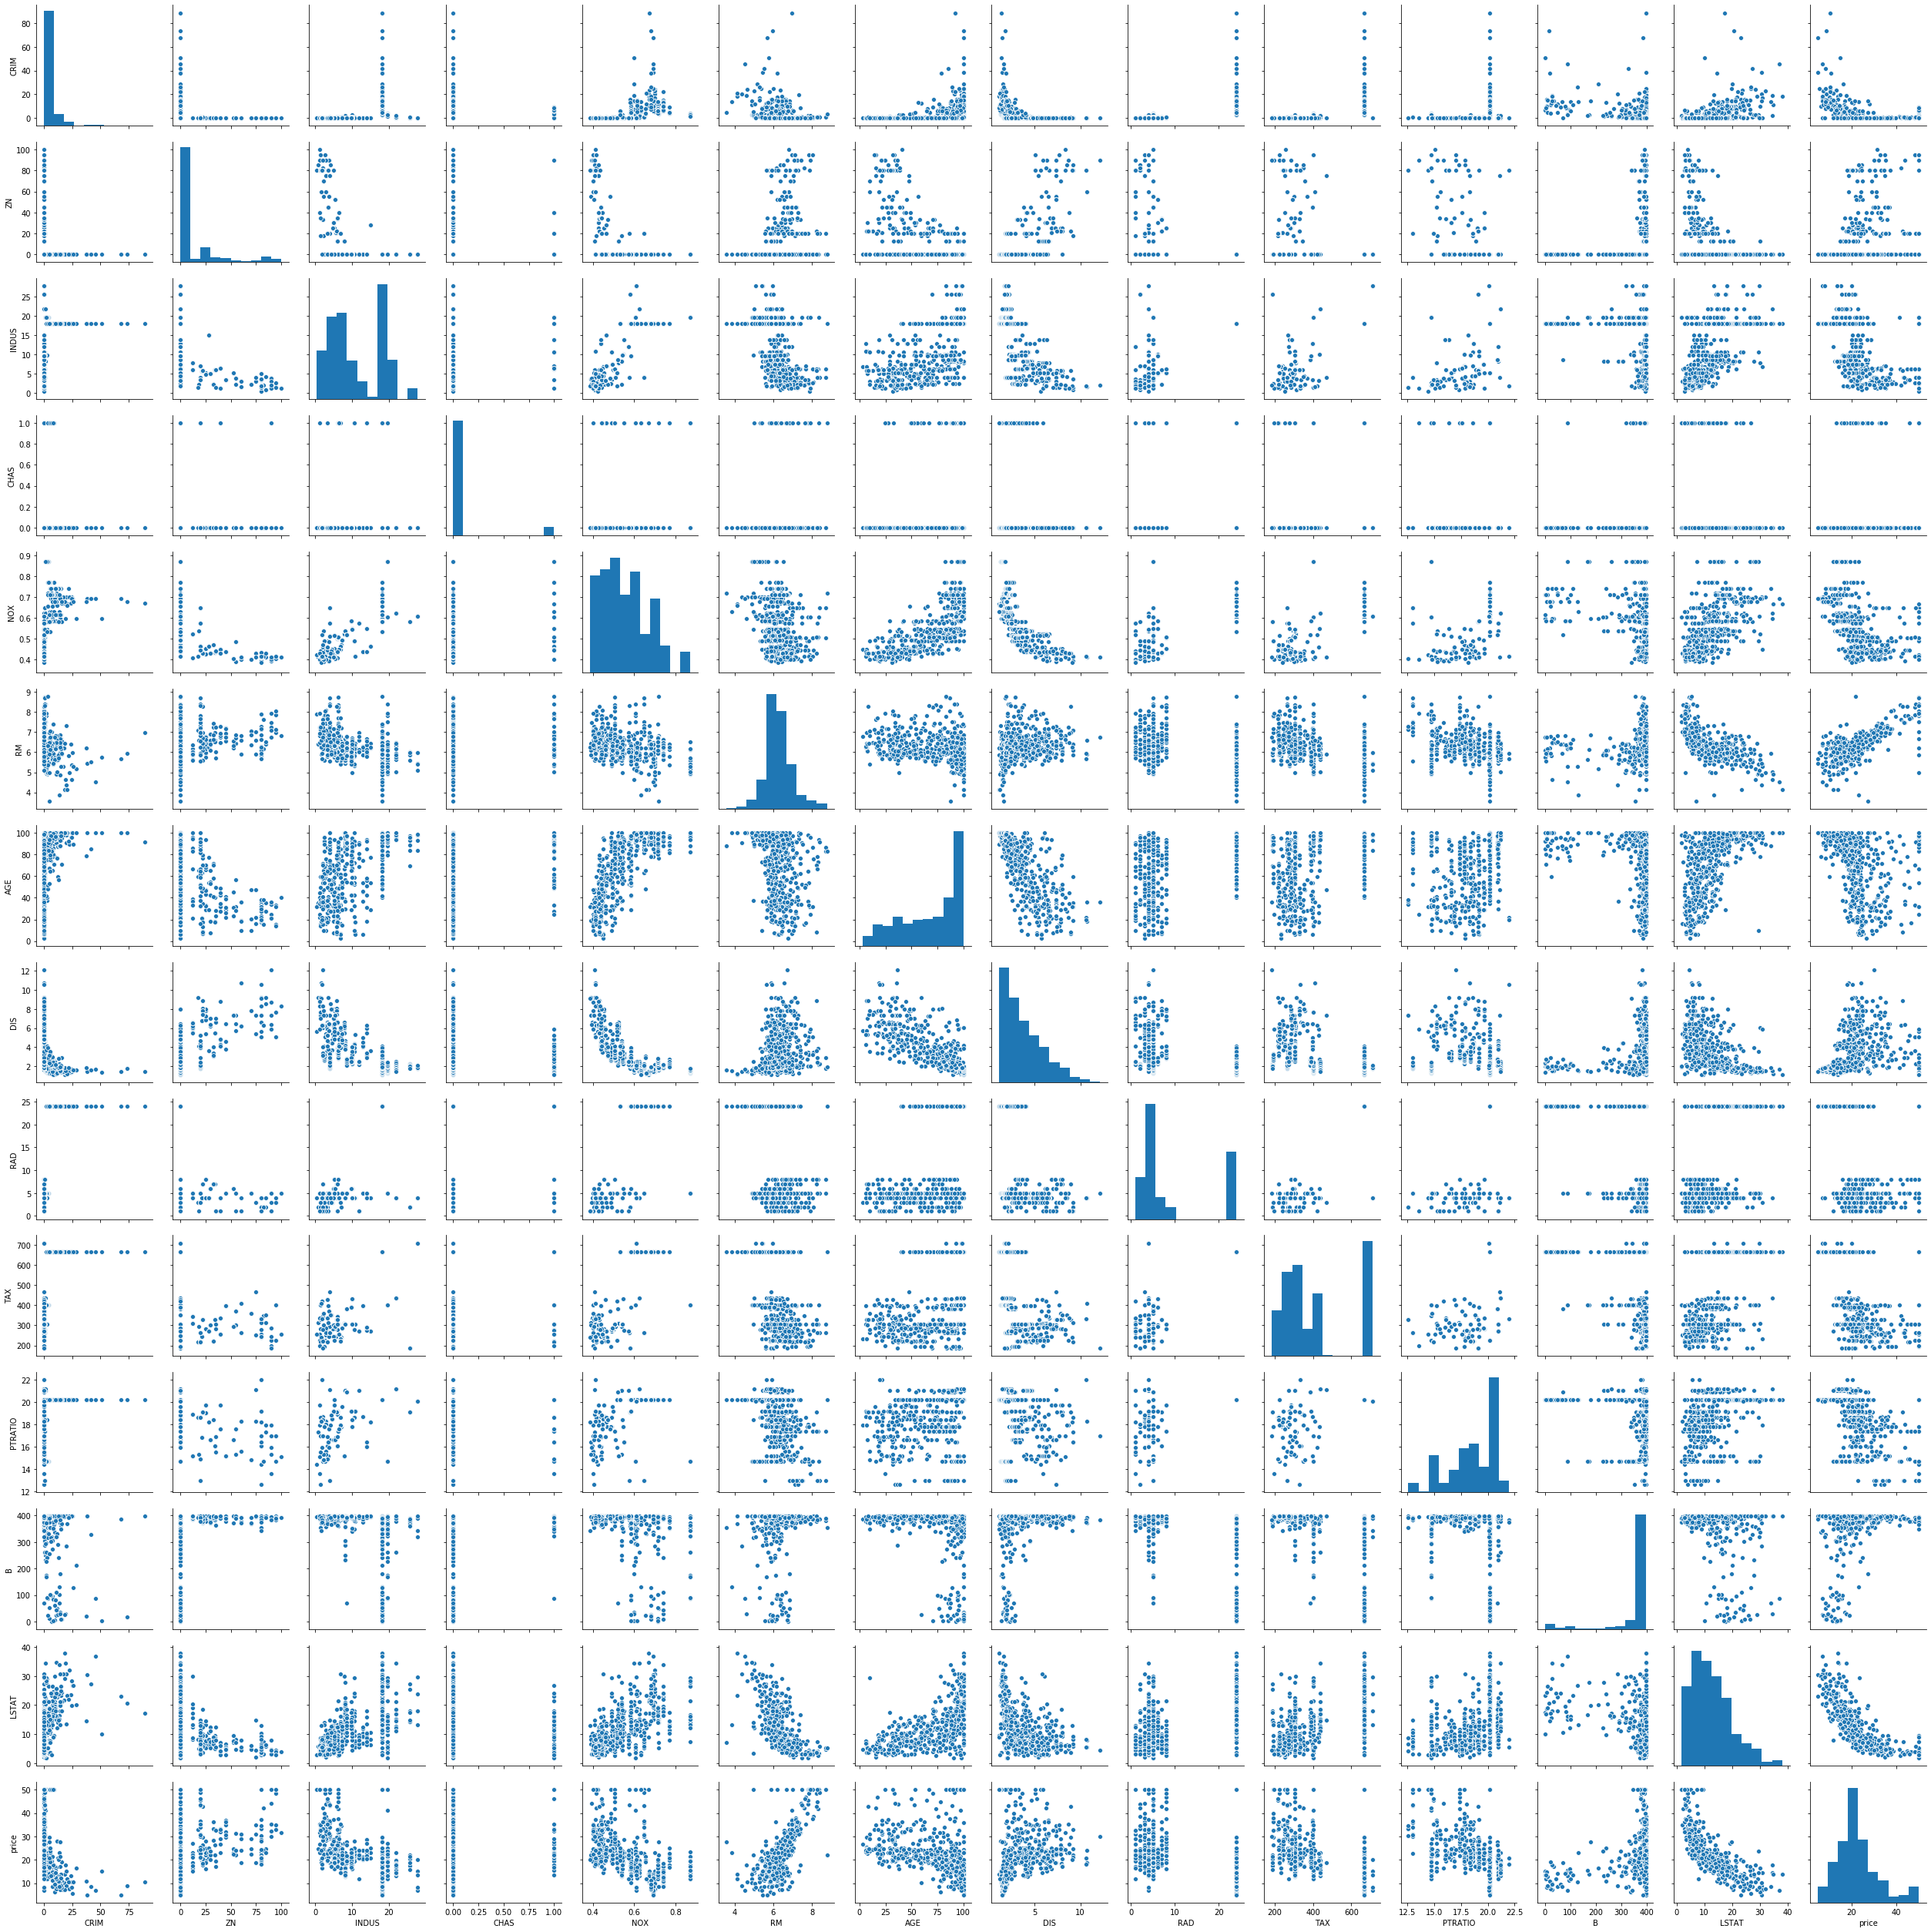

In [27]:
sns.pairplot(data)

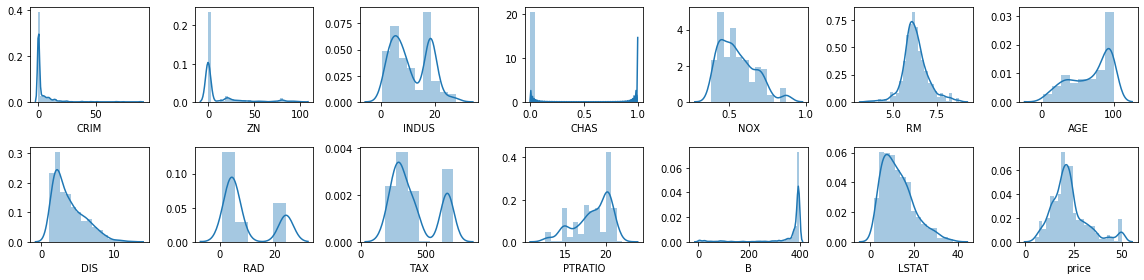

In [28]:
rows = 2
cols = 7
fig , ax  = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

col = data.columns
index = 0

for i in range(rows):
   for j in range (cols):
       sns.distplot(data[col[index]], ax = ax[i][j])
       index = index + 1 

plt.tight_layout()

In [29]:
cormatt = data.corr()

In [30]:
cormatt

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


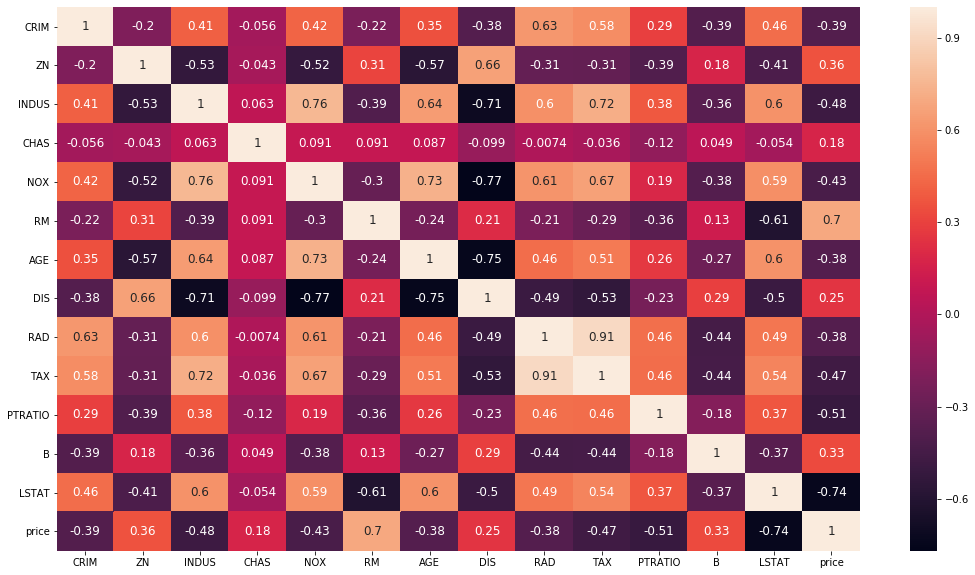

In [31]:
fix , ax = plt.subplots(figsize = (18,10))
sns.heatmap(cormatt, annot=True , annot_kws={'size': 12})

In [124]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df 
            
    

In [125]:
threshold = 0.5
core_value = getCorrelatedFeature(cormatt['price'],threshold)

In [126]:
core_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
price,1.000000


In [127]:
correlated_data = data[core_value.index]

In [128]:
correlated_data.head(10)

,RM,PTRATIO,LSTAT,price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
5,6.430,18.7,5.21,28.7
6,6.012,15.2,12.43,22.9
7,6.172,15.2,19.15,27.1
8,5.631,15.2,29.93,16.5
9,6.004,15.2,17.10,18.9


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

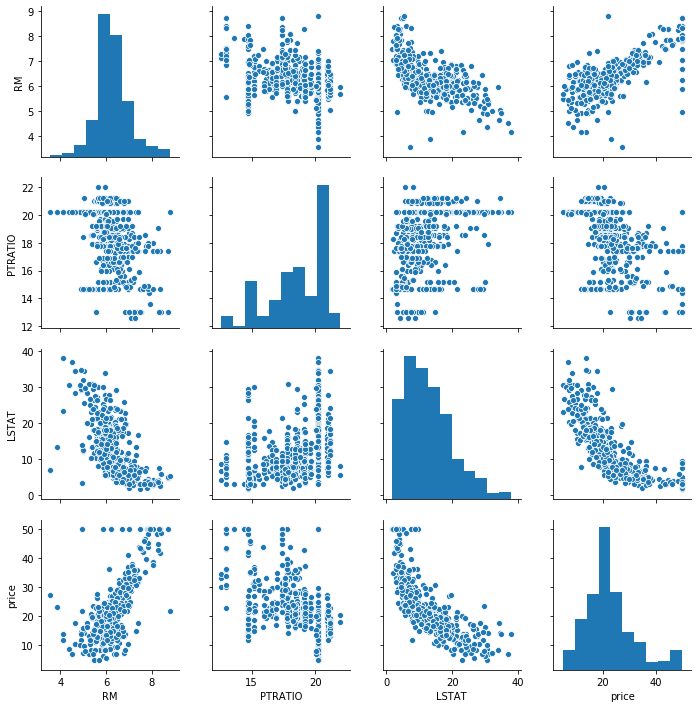

In [70]:
sns.pairplot(correlated_data)
plt.tight_layout

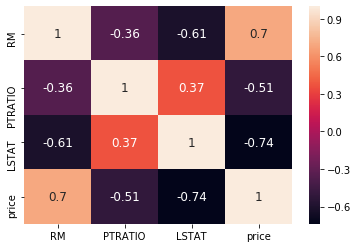

In [129]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size' : 12})

In [130]:
X = correlated_data.drop(labels='price', axis=1)
y = correlated_data['price']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [132]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [133]:
df = pd.DataFrame(data = [y_predict, y_test])


In [134]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

In [135]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [136]:
def performance_metrics(feature, th, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(feature) - 1)
    total_features_name.append(str(feature))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data = [total_features_name, total_features, selected_correlation_value, r2_scores, mae_value, mse_value],
                                    index = ['features name', '#feature', 'corr value', 'r2 score','MAE', 'MSE'])

    return metrics_dataframe.T

In [137]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr value,r2 score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678


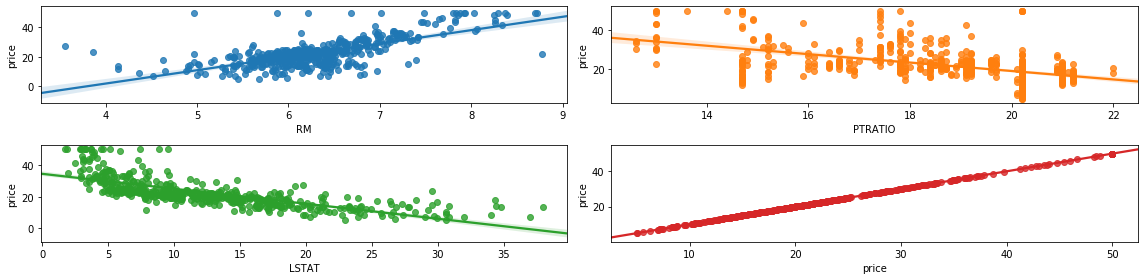

In [138]:
rows = 2
cols = 2
fig , ax  = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

col = correlated_data.columns
index = 0

for i in range(rows):
   for j in range (cols):
       sns.regplot(correlated_data[col[index]], y =correlated_data['price'] ,ax = ax[i][j])
       index = index + 1 

plt.tight_layout()

In [139]:
threshold = 0.6
core_value = getCorrelatedFeature(cormatt['price'], threshold)
core_value

,Corr Value
RM,0.695360
LSTAT,-0.737663
price,1.000000


In [140]:
correlated_data = data[core_value.index]
correlated_data.head()

,RM,LSTAT,price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [141]:
def get_y_predict(corredata):
    X = corredata.drop(labels='price', axis=1)
    y = corredata['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return y_predict


In [142]:
y_predict = get_y_predict(correlated_data)


In [143]:
performance_metrics(correlated_data.columns.values,threshold, y_test, y_predict)

,features name,#feature,corr value,r2 score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'price'],2,0.6,0.540908,4.14244,37.3831


In [144]:
threshold = 0.7
core_value = getCorrelatedFeature(cormatt['price'], threshold)
core_value


,Corr Value
LSTAT,-0.737663
price,1.000000


In [145]:
correlated_data = data[core_value.index]
correlated_data.head()

,LSTAT,price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [146]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values,threshold, y_test, y_predict)

,features name,#feature,corr value,r2 score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'price'],1,0.7,0.430957,4.86401,46.3363


In [147]:
correlated_data = data[['RM', 'price']]
correlated_data.head()

,RM,price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [148]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr value,r2 score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'price'],1,0.7,0.430957,4.86401,46.3363
3,['RM' 'price'],1,0.7,0.423944,4.32474,46.9074


In [149]:
threshold = 0.4
core_value = getCorrelatedFeature(cormatt['price'], threshold)
core_value


,Corr Value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
price,1.000000


In [150]:
correlated_data = data[core_value.index]
correlated_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [151]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr value,r2 score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'price'],1,0.7,0.430957,4.86401,46.3363
3,['RM' 'price'],1,0.7,0.423944,4.32474,46.9074
4,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'p...,6,0.4,0.476203,4.3945,42.6519


In [152]:
from sklearn.model_selection import learning_curve, ShuffleSplit

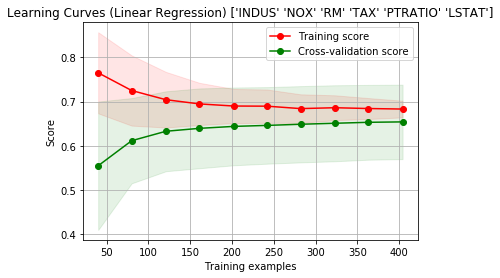

In [156]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
    n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1,
        color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X = correlated_data.drop(labels = ['price'], axis = 1)
y = correlated_data['price']

title = "Learning Curves (Linear Regression) " + str(X.columns.values)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()